# Chapter: Time Series Analysis: Concepts and Applications

## Topic: ARMA illustration

In [1]:
# import packages
import numpy as np, matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.ticker import MaxNLocator

plt.rcParams.update({'font.size': 14})
np.random.seed(100)

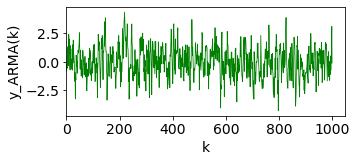

In [3]:
# generate data for ARMA(1,2) process
ARMAprocess = ArmaProcess(ar=[1, -0.3], ma=[1, 0.3, 0.45])
y_ARMA = ARMAprocess.generate_sample(nsample=1000)

# plot
plt.figure(figsize=(5,2))
plt.plot(y_ARMA, 'g', linewidth=0.8)
plt.ylabel('y_ARMA(k)'), plt.xlabel('k'), plt.xlim(0)
plt.show()

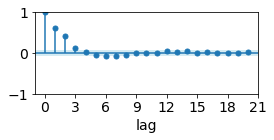

C:\Users\f0ne44\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


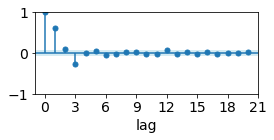

In [4]:
# generate ACF and PACF plots for y_ARMA
conf_int = 2/np.sqrt(len(y_ARMA))

fig, ax = plt.subplots(1,1,figsize=(4,1.5))
plot_acf(y_ARMA, lags= 20, alpha=None, title='', ax=ax)
plt.gca().axhspan(-conf_int, conf_int, facecolor='lightblue', alpha=0.5) # shaded confidence interval
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # integer xtick labels
plt.xlabel('lag')
plt.show()

fig, ax = plt.subplots(1,1,figsize=(4,1.5))
plot_pacf(y_ARMA, lags= 20, alpha=None, title='', ax=ax)
plt.gca().axhspan(-conf_int, conf_int, facecolor='lightblue', alpha=0.5) # shaded confidence interval
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # integer xtick labels
plt.xlabel('lag')
plt.show()

In [7]:
# Determine the optimal AR and MA orders
from statsmodels.tsa.stattools import arma_order_select_ic

y_ARMA_centered = y_ARMA - np.mean(y_ARMA)
res = arma_order_select_ic(y_ARMA_centered, max_ma=4, ic=["aic"])
p, r = res.aic_min_order
print('(p, r) = ', res.aic_min_order)

C:\Users\f0ne44\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\f0ne44\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\f0ne44\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(p, r) =  (1, 2)


In [6]:
#%% Fit an ARMA(p,r) model
model = ARIMA(y_ARMA_centered, order=(p, 0, r)) # order = (p,d,r)
results = model.fit()

# Print out summary information on the fit
print(results.summary())
print('[a1] = ', -results.arparams); print('[c1, c2] = ', results.maparams)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1424.590
Date:                Tue, 16 May 2023   AIC                           2859.180
Time:                        22:54:48   BIC                           2883.719
Sample:                             0   HQIC                          2868.507
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0011      0.079     -0.014      0.989      -0.155       0.153
ar.L1          0.3253      0.059      5.532      0.000       0.210       0.441
ma.L1          0.2534      0.055      4.650      0.0

In [5]:
#%% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                         Residual analysis
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

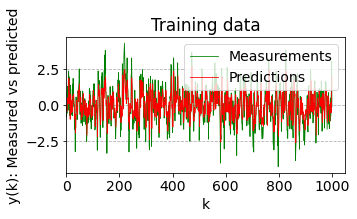

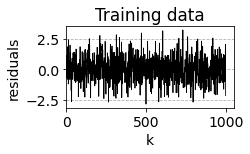

In [8]:
# get model predictions and residuals on training dataset
y_ARMA_centered_pred = results.predict()
residuals = y_ARMA_centered - y_ARMA_centered_pred

plt.figure(figsize=(5,2.5)), plt.title('Training data'), plt.plot(y_ARMA_centered, 'g', linewidth=0.8, label='Measurements')
plt.plot(y_ARMA_centered_pred, 'r', linewidth=0.8, label='Predictions')
plt.ylabel('y(k): Measured vs predicted'), plt.xlabel('k'), plt.legend(), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')

plt.figure(figsize=(3,1.5)), plt.plot(residuals, 'black', linewidth=0.8)
plt.title('Training data'), plt.ylabel('residuals'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

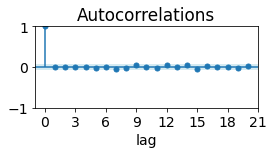

In [9]:
# ACF residuals
fig, ax = plt.subplots(1,1,figsize=(4,1.5))
plot_acf(residuals, lags= 20, alpha=None, title='', ax=ax)
plt.gca().axhspan(-conf_int, conf_int, facecolor='lightblue', alpha=0.5) # shaded confidence interval
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # integer xtick labels
plt.xlabel('lag'), plt.title('Autocorrelations')
plt.show()